- 기초탄기본분석(총괄)
- 일단 전체 합계분석

In [1]:
import pandas as pd
from pathlib import Path

csv_path = Path('municipal_climate_plan_V4.csv')
encodings = ['utf-8', 'utf-8-sig', 'cp949']

for enc in encodings:
    try:
        df = pd.read_csv(csv_path, encoding=enc)
        print(f'CSV 로드 인코딩: {enc}')
        break
    except UnicodeDecodeError:
        continue
else:
    df = pd.read_csv(csv_path)
    print('CSV 로드 인코딩: 기본값 사용')

col_2018 = '2018년'
col_2030 = '2030년'
col_2034 = '2034년' if '2034년' in df.columns else '2034'

for c in [col_2018, col_2030, col_2034]:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df['2030년감축률'] = ((df[col_2018] - df[col_2030]) / df[col_2018] * 100).round(1)
df['2034년감축률'] = ((df[col_2018] - df[col_2034]) / df[col_2018] * 100).round(1)

print('데이터프레임 크기:', df.shape)
display(df.head(5))

CSV 로드 인코딩: utf-8
데이터프레임 크기: (1309, 18)


,광역,지역명,광역_지역명,구분,도시유형,총인구수_명,GRDP_억원,노령화지수,2018년,2025년,2026년,2027년,2028년,2029년,2030년,2034년,2030년감축률,2034년감축률
0,강원,강릉시,강원 강릉시,건물,중소도시,207731,69199,51.0,851.0,737.0,731.0,724.0,718.0,712.0,706.0,680.0,17.0,20.1
1,강원,강릉시,강원 강릉시,농축산,중소도시,207731,69199,51.0,83.0,75.0,73.0,72.0,71.0,70.0,69.0,64.0,16.9,22.9
2,강원,강릉시,강원 강릉시,수송,중소도시,207731,69199,51.0,441.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,-1.6,-1.6
3,강원,강릉시,강원 강릉시,폐기물,중소도시,207731,69199,51.0,168.0,159.0,159.0,159.0,158.0,158.0,158.0,158.0,6.0,6.0
4,강원,강릉시,강원 강릉시,흡수원,중소도시,207731,69199,51.0,-676.0,-635.0,-637.0,-639.0,-640.0,-642.0,-644.0,-652.0,4.7,3.6


In [2]:
# '구분'과 '도시유형' 고유값 출력
import re
import pandas as pd

# 컬럼 이름 정리
cols = df.columns.astype(str).str.strip()
df.columns = cols

# 대상 컬럼 이름 찾기 (공백 무시)
def find_col(target):
    t = re.sub(r"\s+", "", target)
    for c in df.columns:
        if re.sub(r"\s+", "", c) == t:
            return c
    return None

col_div = find_col('구분')
col_type = find_col('도시유형')

results = {}
if col_div:
    unique_div = (
        df[col_div]
        .dropna()
        .astype(str)
        .str.strip()
        .replace('', pd.NA)
        .dropna()
        .unique()
    )
    results['구분'] = sorted(unique_div)
else:
    print("'구분' 컬럼을 찾지 못했습니다.")

if col_type:
    unique_type = (
        df[col_type]
        .dropna()
        .astype(str)
        .str.strip()
        .replace('', pd.NA)
        .dropna()
        .unique()
    )
    results['도시유형'] = sorted(unique_type)
else:
    print("'도시유형' 컬럼을 찾지 못했습니다.")

for key, vals in results.items():
    print(f"{key} 고유값 ({len(vals)}개)")
    display(pd.DataFrame({key: vals}))

구분 고유값 (6개)


,구분
0,건물
1,농축산
2,수송
3,폐기물
4,합계
5,흡수원


도시유형 고유값 (3개)


,도시유형
0,농어촌
1,대도시
2,중소도시


In [3]:
# '구분' 컬럼에서 '합계'인 행만 추출하여 df_sum에 저장
df_sum = df[df[col_div].astype(str).str.strip() == '합계']

print('df_sum 크기:', df_sum.shape)
display(df_sum.head())

df_sum 크기: (225, 18)


,광역,지역명,광역_지역명,구분,도시유형,총인구수_명,GRDP_억원,노령화지수,2018년,2025년,2026년,2027년,2028년,2029년,2030년,2034년,2030년감축률,2034년감축률
5,강원,강릉시,강원 강릉시,합계,중소도시,207731,69199,51.0,1543.0,1419.0,1411.0,1403.0,1395.0,1388.0,1381.0,1350.0,10.5,12.5
11,강원,고성군,강원 고성군,합계,농어촌,26999,15025,55.0,274.0,363.0,365.0,367.0,369.0,371.0,374.0,382.0,-36.5,-39.4
17,강원,동해시,강원 동해시,합계,농어촌,87675,39329,51.0,565.0,489.0,485.0,481.0,477.0,472.0,468.0,451.0,17.2,20.2
23,강원,삼척시,강원 삼척시,합계,농어촌,61735,33564,53.0,608.0,0.0,0.0,0.0,0.0,0.0,487.0,497.0,19.9,18.3
29,강원,속초시,강원 속초시,합계,농어촌,80933,22006,51.0,564.0,538.0,536.0,533.0,530.0,525.0,499.0,370.0,11.5,34.4


2030년 감축률 컬럼명: 2030년감축률
개수: 225
25%: 15.50, 중앙값: 27.80, 평균: 25.37, 75%: 34.90


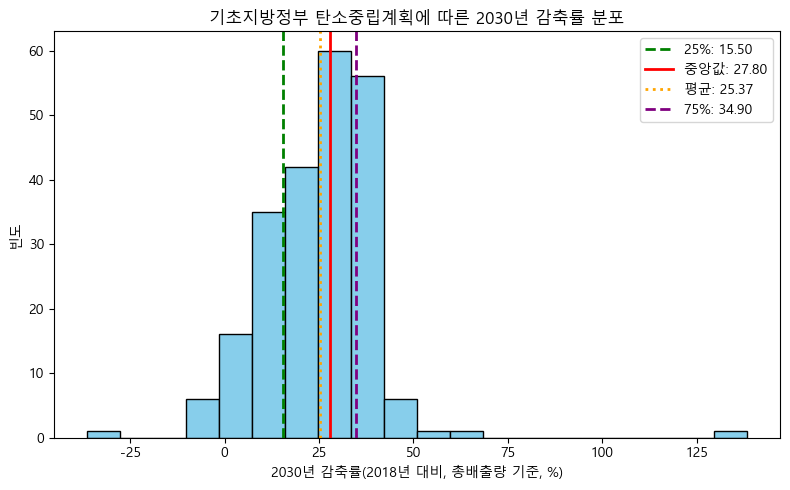

In [4]:
# df_sum에서 2030년 감축률 분포 히스토그램과 요약 통계
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 2030년 감축률 컬럼 자동 탐색 (공백 제거 후 부분 일치)
target_key = '2030년감축률'
pattern = re.sub(r"\s+", "", target_key)
col_2030 = None
for c in df_sum.columns:
    cs = re.sub(r"\s+", "", str(c))
    if pattern in cs:
        col_2030 = c
        break

if col_2030 is None:
    print("'2030년감축률' 컬럼을 찾지 못했습니다. 사용 가능한 컬럼:")
    print(df_sum.columns.tolist())
else:
    print('2030년 감축률 컬럼명:', col_2030)
    # 숫자형으로 변환
    s = pd.to_numeric(df_sum[col_2030], errors='coerce').dropna()

    q25 = s.quantile(0.25)
    median = s.median()
    mean = s.mean()
    q75 = s.quantile(0.75)

    print(f"개수: {len(s)}")
    print(f"25%: {q25:.2f}, 중앙값: {median:.2f}, 평균: {mean:.2f}, 75%: {q75:.2f}")

    plt.figure(figsize=(8, 5))
    plt.hist(s, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('2030년 감축률(2018년 대비, 총배출량 기준, %)')
    plt.ylabel('빈도')
    plt.title('기초지방정부 탄소중립계획에 따른 2030년 감축률 분포')

    # 분위수와 평균선 표시
    for v, label, color, style in [
        (q25, '25%', 'green', '--'),
        (median, '중앙값', 'red', '-'),
        (mean, '평균', 'orange', ':'),
        (q75, '75%', 'purple', '--'),
    ]:
        plt.axvline(v, color=color, linestyle=style, linewidth=2, label=f'{label}: {v:.2f}')

    plt.legend()
    plt.tight_layout()
    plt.show()

광역 컬럼명: 광역
2030년 감축률 컬럼명: 2030년감축률

광역별 평균 2030년 감축률(%)


C:\Users\bkkim\AppData\Local\Temp\ipykernel_31260\2048348331.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['_2030감축률_num'] = pd.to_numeric(df_sum[col_2030], errors='coerce')


,평균감축률(%)
광역,
충남,37.100000
서울,35.408000
대전,34.400000
울산,34.140000
부산,32.968750
경기,32.464516
대구,28.366667
인천,27.488889
광주,24.140000



전체 평균 2030년 감축률: 25.95%


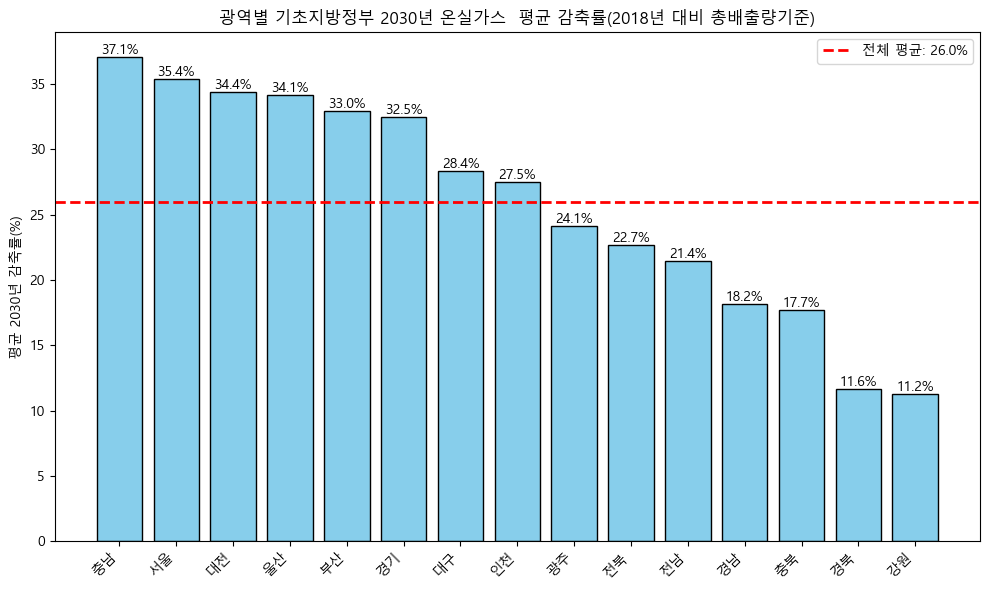

In [5]:
# 광역별 2030년 감축률 평균 막대그래프
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 광역 컬럼 자동 탐색 (예: 광역, 시도 등 포함)
region_col = None
for c in df_sum.columns:
    cs = re.sub(r"\s+", "", str(c))
    if ('광역' in cs) or ('시도' in cs):
        region_col = c
        break

if region_col is None:
    print("광역 단위를 나타내는 컬럼을 찾지 못했습니다. 사용 가능한 컬럼:")
    print(df_sum.columns.tolist())
else:
    print('광역 컬럼명:', region_col)
    print('2030년 감축률 컬럼명:', col_2030)

    # 2030년 감축률 숫자형 컬럼 생성
    df_sum['_2030감축률_num'] = pd.to_numeric(df_sum[col_2030], errors='coerce')

    grp = (
        df_sum
        .dropna(subset=['_2030감축률_num'])
        .groupby(region_col)['_2030감축률_num']
        .mean()
        .sort_values(ascending=False)
    )

    print('\n광역별 평균 2030년 감축률(%)')
    display(grp.to_frame('평균감축률(%)'))

    # 전체 평균 (광역 평균들의 평균)
    overall_mean = grp.mean()
    print(f"\n전체 평균 2030년 감축률: {overall_mean:.2f}%")

    # 막대그래프
    plt.figure(figsize=(10, 6))
    x = range(len(grp))
    plt.bar(x, grp.values, color='skyblue', edgecolor='black')
    plt.xticks(x, grp.index, rotation=45, ha='right')
    plt.ylabel('평균 2030년 감축률(%)')
    plt.title('광역별 기초지방정부 2030년 온실가스  평균 감축률(2018년 대비 총배출량기준)')

    # 각 막대 위에 값 레이블 표시
    for i, val in enumerate(grp.values):
        plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

    # 전체 평균 수평 점선 (빨간색)
    plt.axhline(overall_mean, color='red', linestyle='--', linewidth=2, label=f'전체 평균: {overall_mean:.1f}%')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [6]:
# df에서 '구분'이 '합계'인 행(df_sum) 중 2030년 감축률이 40% 이상인 자치구 수
import pandas as pd

# 2030년 감축률 숫자 시리즈 준비
if '_2030감축률_num' in df_sum.columns:
    s = df_sum['_2030감축률_num']
else:
    s = pd.to_numeric(df_sum[col_2030], errors='coerce')

cnt_40_up = (s >= 40).sum()
print(f"2030년 감축률이 40% 이상인 자치구 수: {cnt_40_up}개")

2030년 감축률이 40% 이상인 자치구 수: 17개


In [7]:
# 2030년 감축률이 40% 이상인 자치구 목록 확인
import re
import pandas as pd

# 2030년 감축률 숫자 시리즈
if '_2030감축률_num' in df_sum.columns:
    s = df_sum['_2030감축률_num']
else:
    s = pd.to_numeric(df_sum[col_2030], errors='coerce')

mask = s >= 40

# 자치구(기초지자체) 이름 컬럼: 이 데이터에서는 '지역명' 사용
name_col = '지역명'

# 광역 컬럼도 가능하면 탐색
region_col_auto = None
for c in df_sum.columns:
    cs = re.sub(r"\s+", "", str(c))
    if ('광역' in cs) or ('시도' in cs):
        region_col_auto = c
        break

cols_to_show = []
if region_col_auto is not None:
    cols_to_show.append(region_col_auto)
if name_col is not None and name_col in df_sum.columns:
    cols_to_show.append(name_col)
cols_to_show.append(col_2030)

df_40 = df_sum.loc[mask, cols_to_show].copy()
df_40[col_2030] = pd.to_numeric(df_40[col_2030], errors='coerce')
df_40 = df_40.sort_values(col_2030, ascending=False)

print(f"2030년 감축률이 40% 이상인 자치구 수: {len(df_40)}개")
display(df_40.reset_index(drop=True))

2030년 감축률이 40% 이상인 자치구 수: 17개


,광역,지역명,2030년감축률
0,충남,보령시,138.3
1,충남,당진시,67.0
2,경기,동두천시,53.0
3,부산,영도구,50.2
4,충남,금산군,47.6
5,서울,강동구,46.6
6,대구,달서구,44.2
7,부산,남구,44.1
8,부산,금정구,42.9
9,경기,오산시,41.2


도시유형: ['중소도시' '농어촌' '대도시']
도시유형=중소도시 (표본 수=49개, 중앙값=27.90, 평균=26.66)
도시유형=농어촌 (표본 수=89개, 중앙값=15.20, 평균=15.57)
도시유형=대도시 (표본 수=86개, 중앙값=33.45, 평균=33.48)


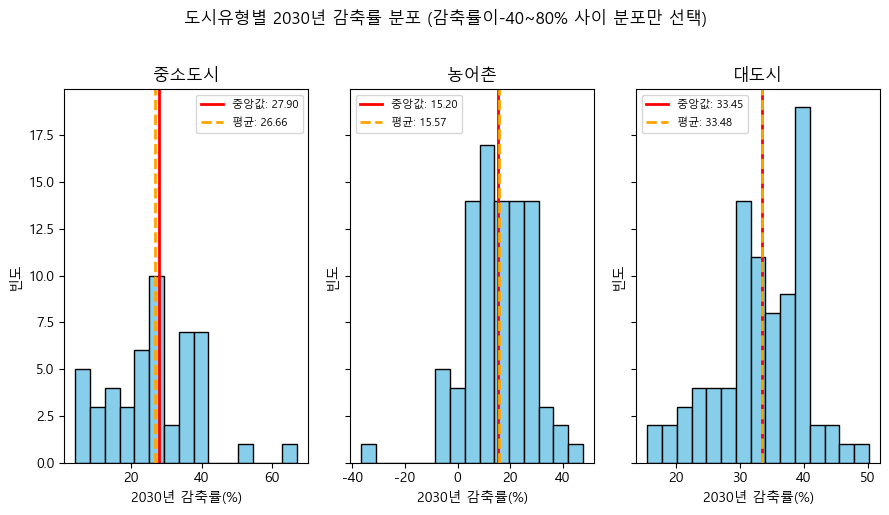

In [8]:
# df_sum에서 2030년 감축률(-40~80) 범위 내 값에 대해 도시유형별 히스토그램 (하나의 Figure 안에 3개)
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 2030년 감축률 숫자 시리즈 (이미 있으면 재사용)
if '_2030감축률_num' in df_sum.columns:
    s_all = df_sum['_2030감축률_num']
else:
    s_all = pd.to_numeric(df_sum[col_2030], errors='coerce')

# 범위 필터 -40 ~ 80
mask_range = (s_all >= -40) & (s_all <= 80)
df_range = df_sum.loc[mask_range].copy()
df_range['_2030감축률_num'] = s_all[mask_range]

# 도시유형별 그룹
if col_type is None:
    raise ValueError("'도시유형' 컬럼명을 알 수 없습니다.")

city_types = (
    df_range[col_type]
    .astype(str)
    .str.strip()
    .replace('', pd.NA)
.dropna()
    .unique()
)

print('도시유형:', city_types)

n_types = len(city_types)
fig, axes = plt.subplots(1, n_types, figsize=(9, 5), sharey=True)
if n_types == 1:
    axes = [axes]  # 서브플롯이 1개인 경우 리스트로 처리

for ax, ct in zip(axes, city_types):
    sub = df_range[df_range[col_type].astype(str).str.strip() == str(ct)].copy()
    vals = sub['_2030감축률_num'].dropna()
    if len(vals) == 0:
        ax.set_visible(False)
        continue

    median_ct = vals.median()
    mean_ct = vals.mean()

    print(f"도시유형={ct} (표본 수={len(vals)}개, 중앙값={median_ct:.2f}, 평균={mean_ct:.2f})")

    ax.hist(vals, bins=15, color='skyblue', edgecolor='black')
    ax.set_xlabel('2030년 감축률(%)')
    ax.set_ylabel('빈도')
    ax.set_title(f"{ct}")

    # 중앙값·평균선 표시
    ax.axvline(median_ct, color='red', linestyle='-', linewidth=2, label=f'중앙값: {median_ct:.2f}')
    ax.axvline(mean_ct, color='orange', linestyle='--', linewidth=2, label=f'평균: {mean_ct:.2f}')
    ax.legend(fontsize=8)

plt.suptitle('도시유형별 2030년 감축률 분포 (감축률이-40~80% 사이 분포만 선택)', y=1.02)
plt.tight_layout()
plt.show()

상위 15개 지역:


,광역,지역명,2030년감축률,_2030감축률_num
0,충남,보령시,138.3,138.3
1,충남,당진시,67.0,67.0
2,경기,동두천시,53.0,53.0
3,부산,영도구,50.2,50.2
4,충남,금산군,47.6,47.6
5,서울,강동구,46.6,46.6
6,대구,달서구,44.2,44.2
7,부산,남구,44.1,44.1
8,부산,금정구,42.9,42.9
9,경기,오산시,41.2,41.2



하위 15개 지역:


,광역,지역명,2030년감축률,_2030감축률_num
0,강원,고성군,-36.5,-36.5
1,강원,횡성군,-7.4,-7.4
2,경북,울릉군,-7.2,-7.2
3,대구,군위군,-6.1,-6.1
4,경북,영천시,-4.8,-4.8
5,충남,서천군,-3.1,-3.1
6,경남,의령군,-2.0,-2.0
7,강원,인제군,0.7,0.7
8,경북,예천군,1.1,1.1
9,충북,괴산군,1.9,1.9


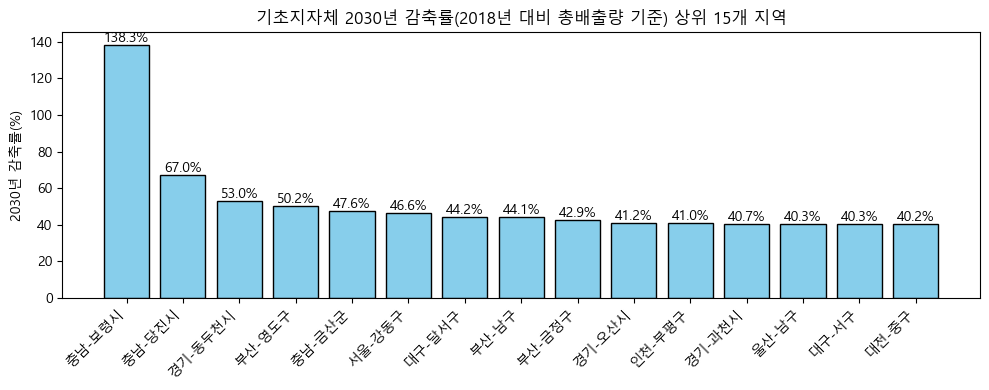

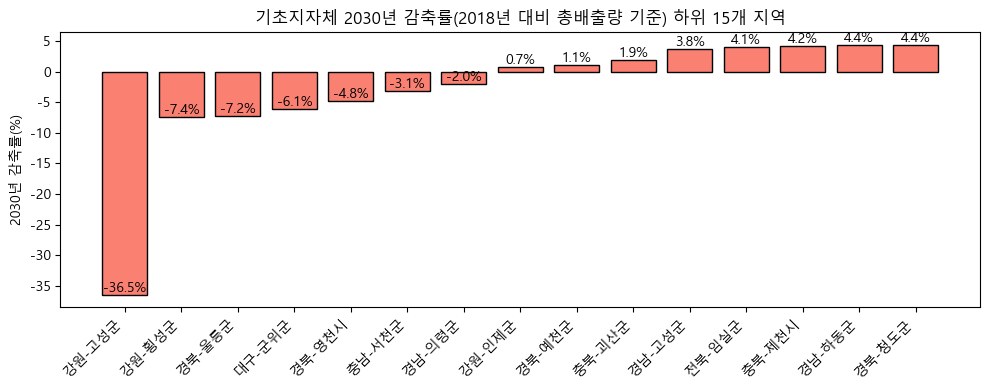

In [9]:
# df_sum에서 2030년 감축률 상위 15개 / 하위 15개 지역 세로 막대그래프 (그래프 2개로 분리)
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 2030년 감축률 숫자형 시리즈 준비
if '_2030감축률_num' in df_sum.columns:
    s_num = df_sum['_2030감축률_num']
else:
    s_num = pd.to_numeric(df_sum[col_2030], errors='coerce')
    df_sum['_2030감축률_num'] = s_num

# 기본 정보 포함한 데이터프레임 구성
cols_base = []
for c in ['광역', '지역명', col_2030, '_2030감축률_num']:
    if c in df_sum.columns:
        cols_base.append(c)
df_rank = df_sum[cols_base].copy()
df_rank = df_rank.dropna(subset=['_2030감축률_num'])

# 상위 15 / 하위 15
top15 = df_rank.sort_values('_2030감축률_num', ascending=False).head(15)
bottom15 = df_rank.sort_values('_2030감축률_num', ascending=True).head(15)

print('상위 15개 지역:')
display(top15.reset_index(drop=True))
print('\n하위 15개 지역:')
display(bottom15.reset_index(drop=True))

# 그래프용 레이블 (광역-지역명)
def make_labels(df_):
    if '광역' in df_.columns and '지역명' in df_.columns:
        return df_['광역'].astype(str) + '-' + df_['지역명'].astype(str)
    elif '지역명' in df_.columns:
        return df_['지역명'].astype(str)
    else:
        return df_.index.astype(str)

labels_top = make_labels(top15)
labels_bottom = make_labels(bottom15)

# 그래프 1: 상위 15
plt.figure(figsize=(10, 4))
x_top = range(len(top15))
plt.bar(x_top, top15['_2030감축률_num'], color='skyblue', edgecolor='black')
plt.xticks(x_top, labels_top, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('기초지자체 2030년 감축률(2018년 대비 총배출량 기준) 상위 15개 지역')

# 막대 위에 값 레이블 표시
for i, val in enumerate(top15['_2030감축률_num']):
    plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 그래프 2: 하위 15
plt.figure(figsize=(10, 4))
x_bot = range(len(bottom15))
plt.bar(x_bot, bottom15['_2030감축률_num'], color='salmon', edgecolor='black')
plt.xticks(x_bot, labels_bottom, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('기초지자체 2030년 감축률(2018년 대비 총배출량 기준) 하위 15개 지역')

# 막대 위에 값 레이블 표시
for i, val in enumerate(bottom15['_2030감축률_num']):
    plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [11]:
# df_sum에 1인당 경제규모 컬럼 추가 (GRDP_억원 / 총인구수_명)
import pandas as pd

if 'df_sum' not in globals():
    raise RuntimeError("df_sum이 정의되어 있지 않습니다. 앞의 셀을 먼저 실행해 주세요.")

required_cols = ['GRDP_억원', '총인구수_명']
missing = [c for c in required_cols if c not in df_sum.columns]
if missing:
    raise KeyError(f"df_sum에 다음 컬럼이 없습니다: {missing}")

# 문자열 등이 섞여 있을 수 있으므로 안전하게 수치형으로 변환 후 계산
_grdp = pd.to_numeric(df_sum['GRDP_억원'], errors='coerce')
_pop = pd.to_numeric(df_sum['총인구수_명'], errors='coerce')

# 1인당 경제규모: GRDP_억원 / 총인구수_명 (단위: 억원/명)
df_sum['1인당경제규모'] = _grdp / _pop

print("'1인당경제규모' 컬럼이 df_sum에 추가되었습니다.")
df_sum[['광역', '지역명', 'GRDP_억원', '총인구수_명', '1인당경제규모']].head()

'1인당경제규모' 컬럼이 df_sum에 추가되었습니다.


C:\Users\bkkim\AppData\Local\Temp\ipykernel_31260\3774905972.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['1인당경제규모'] = _grdp / _pop


,광역,지역명,GRDP_억원,총인구수_명,1인당경제규모
5,강원,강릉시,69199,207731,0.333118
11,강원,고성군,15025,26999,0.556502
17,강원,동해시,39329,87675,0.448577
23,강원,삼척시,33564,61735,0.543679
29,강원,속초시,22006,80933,0.271904


(이상치 제거 후) 피어슨 상관계수: 0.061
표본 수: 222개


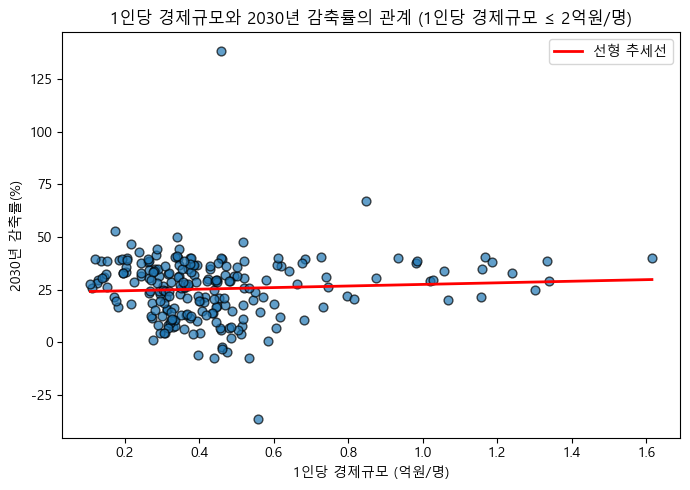

In [12]:
# df_sum에서 1인당 경제규모와 2030년 감축률의 상관관계 시각화 (1인당 경제규모 2억원 초과 이상치 제거)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 필요한 컬럼 존재 여부 확인
for col in ['1인당경제규모', '_2030감축률_num']:
    if col not in df_sum.columns:
        raise KeyError(f"df_sum에 '{col}' 컬럼이 없습니다. 앞선 셀들을 먼저 실행해 주세요.")

# 분석에 사용할 데이터 (결측 제거)
sub = df_sum[['1인당경제규모', '_2030감축률_num']].copy()
sub = sub.dropna()

# 1인당 경제규모 2억원 초과 이상치 제거
sub = sub[sub['1인당경제규모'] <= 2]

# 상관계수 계산 (피어슨)
corr = sub['1인당경제규모'].corr(sub['_2030감축률_num'])
print(f"(이상치 제거 후) 피어슨 상관계수: {corr:.3f}")
print(f"표본 수: {len(sub)}개")

# 산점도
plt.figure(figsize=(7, 5))
plt.scatter(sub['1인당경제규모'], sub['_2030감축률_num'], alpha=0.7, edgecolor='k', s=40)
plt.xlabel('1인당 경제규모 (억원/명)')
plt.ylabel('2030년 감축률(%)')
plt.title('1인당 경제규모와 2030년 감축률의 관계 (1인당 경제규모 ≤ 2억원/명)')

# 단순 선형회귀 추세선 추가
if len(sub) >= 2:
    x = sub['1인당경제규모']
    y = sub['_2030감축률_num']
    coef = pd.Series(y).cov(x) / pd.Series(x).var()
    intercept = y.mean() - coef * x.mean()
    x_line = pd.Series(sorted(x))
    y_line = coef * x_line + intercept
    plt.plot(x_line, y_line, color='red', linewidth=2, label='선형 추세선')
    plt.legend()

plt.tight_layout()
plt.show()

(노령화지수 ≤ 500) 노령화지수-2030년 감축률 피어슨 상관계수: -0.109
표본 수: 224개


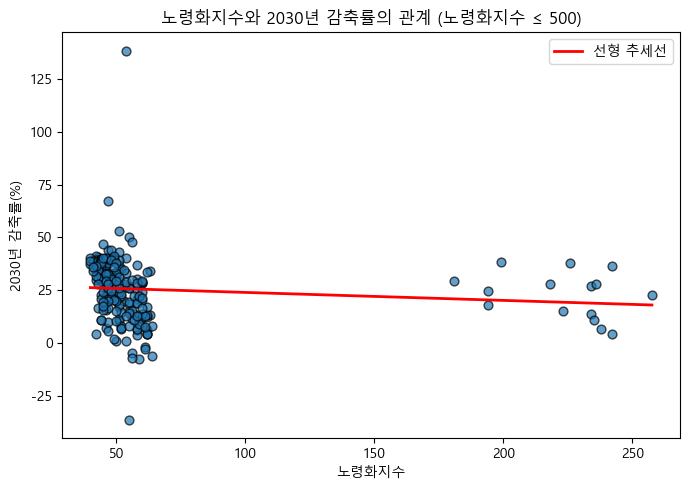

In [13]:
# df_sum에서 노령화지수와 2030년 감축률의 상관관계 시각화 (노령화지수 500 초과 이상치 제거)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 필요한 컬럼 존재 여부 확인
for col in ['노령화지수', '_2030감축률_num']:
    if col not in df_sum.columns:
        raise KeyError(f"df_sum에 '{col}' 컬럼이 없습니다. 앞선 셀들을 먼저 실행해 주세요.")

# 숫자형으로 변환 후 결측 제거
sub = df_sum[['노령화지수', '_2030감축률_num']].copy()
sub['노령화지수'] = pd.to_numeric(sub['노령화지수'], errors='coerce')
sub['_2030감축률_num'] = pd.to_numeric(sub['_2030감축률_num'], errors='coerce')
sub = sub.dropna()

# 노령화지수 500 초과 이상치 제거
sub = sub[sub['노령화지수'] <= 500]

# 상관계수 계산 (피어슨)
corr = sub['노령화지수'].corr(sub['_2030감축률_num'])
print(f"(노령화지수 ≤ 500) 노령화지수-2030년 감축률 피어슨 상관계수: {corr:.3f}")
print(f"표본 수: {len(sub)}개")

# 산점도
plt.figure(figsize=(7, 5))
plt.scatter(sub['노령화지수'], sub['_2030감축률_num'], alpha=0.7, edgecolor='k', s=40)
plt.xlabel('노령화지수')
plt.ylabel('2030년 감축률(%)')
plt.title('노령화지수와 2030년 감축률의 관계 (노령화지수 ≤ 500)')

# 단순 선형회귀 추세선 추가
if len(sub) >= 2:
    x = sub['노령화지수']
    y = sub['_2030감축률_num']
    coef = pd.Series(y).cov(x) / pd.Series(x).var()
    intercept = y.mean() - coef * x.mean()
    x_line = pd.Series(sorted(x))
    y_line = coef * x_line + intercept
    plt.plot(x_line, y_line, color='red', linewidth=2, label='선형 추세선')
    plt.legend()

plt.tight_layout()
plt.show()

노령화지수 구간별 평균 2030년 감축률 및 표본수


C:\Users\bkkim\AppData\Local\Temp\ipykernel_31260\2130696914.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('노령화_구간')['_2030감축률_num']


,평균감축률,표본수
노령화_구간,,
"(39.999, 46.0]",31.310145,69
"(46.0, 50.0]",28.527660,47
"(50.0, 58.0]",22.780328,61
"(58.0, 257.56]",16.746809,47


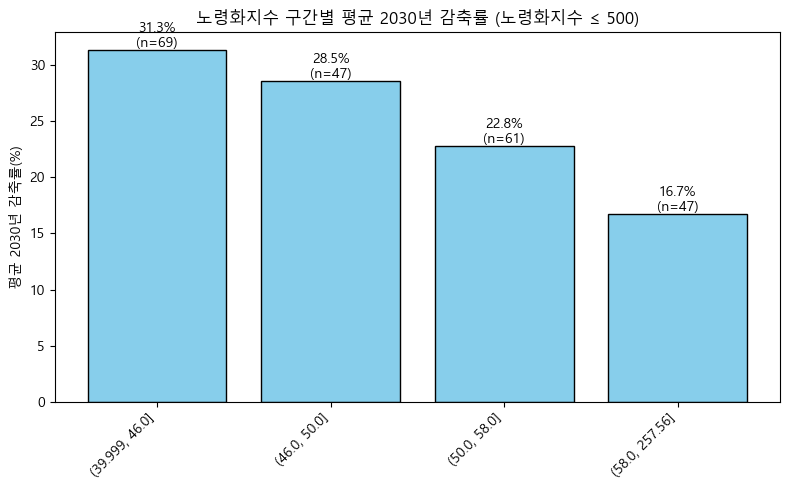

In [14]:
# 노령화지수 구간별 평균 2030년 감축률 막대그래프 (노령화지수 ≤ 500 사용)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 필요한 컬럼 확인
for col in ['노령화지수', '_2030감축률_num']:
    if col not in df_sum.columns:
        raise KeyError(f"df_sum에 '{col}' 컬럼이 없습니다. 앞선 셀들을 먼저 실행해 주세요.")

# 숫자형으로 변환 후, 노령화지수 500 이하만 사용
sub = df_sum[['노령화지수', '_2030감축률_num']].copy()
sub['노령화지수'] = pd.to_numeric(sub['노령화지수'], errors='coerce')
sub['_2030감축률_num'] = pd.to_numeric(sub['_2030감축률_num'], errors='coerce')
sub = sub.dropna()
sub = sub[sub['노령화지수'] <= 500]

# 노령화지수를 4분위수 기준 구간으로 분할
sub['노령화_구간'] = pd.qcut(sub['노령화지수'], q=4, duplicates='drop')

grp_age = (
    sub
    .groupby('노령화_구간')['_2030감축률_num']
    .agg(['mean', 'count'])
    .rename(columns={'mean': '평균감축률', 'count': '표본수'})
)

print('노령화지수 구간별 평균 2030년 감축률 및 표본수')
display(grp_age)

# 막대그래프
plt.figure(figsize=(8, 5))
x = range(len(grp_age))
plt.bar(x, grp_age['평균감축률'], color='skyblue', edgecolor='black')
plt.xticks(x, [str(i) for i in grp_age.index], rotation=45, ha='right')
plt.ylabel('평균 2030년 감축률(%)')
plt.title('노령화지수 구간별 평균 2030년 감축률 (노령화지수 ≤ 500)')

# 각 막대 위에 값, 표본수 레이블
for i, (mean_val, cnt) in enumerate(zip(grp_age['평균감축률'], grp_age['표본수'])):
    plt.text(i, mean_val, f'{mean_val:.1f}%\n(n={cnt})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

서울시 자치구 수: 25개


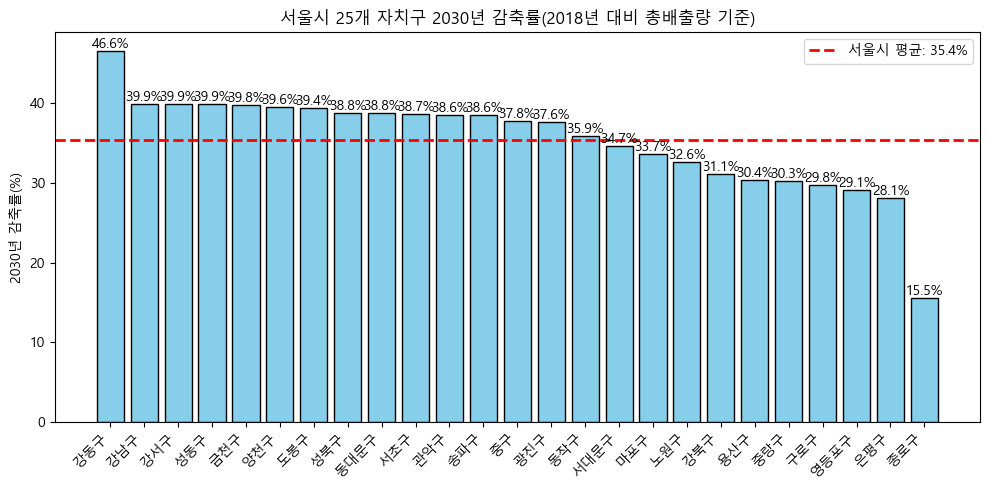

In [15]:
# 서울시 25개 지역의 2030년 감축률 세로 막대그래프 (값 레이블 + 평균 빨간 점선)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 필요한 컬럼 확인
for col in ['광역', '지역명', '_2030감축률_num']:
    if col not in df_sum.columns:
        raise KeyError(f"df_sum에 '{col}' 컬럼이 없습니다. 앞선 셀들을 먼저 실행해 주세요.")

# 서울시 데이터만 선택
seoul = df_sum[df_sum['광역'] == '서울'].copy()
seoul['_2030감축률_num'] = pd.to_numeric(seoul['_2030감축률_num'], errors='coerce')
seoul = seoul.dropna(subset=['_2030감축률_num'])

print(f"서울시 자치구 수: {len(seoul)}개")

# 값 기준으로 내림차순 정렬
seoul = seoul.sort_values('_2030감축률_num', ascending=False)

# 그래프 준비
x = range(len(seoul))
labels = seoul['지역명'].astype(str)
values = seoul['_2030감축률_num']
mean_val = values.mean()

plt.figure(figsize=(10, 5))
plt.bar(x, values, color='skyblue', edgecolor='black')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('서울시 25개 자치구 2030년 감축률(2018년 대비 총배출량 기준)')

# 막대 위에 값 레이블 표시
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# 서울시 평균 감축률 빨간 점선
plt.axhline(mean_val, color='red', linestyle='--', linewidth=2, label=f'서울시 평균: {mean_val:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

- 여기서부터는 건물 분석
- 건물에 대해서도 합계와 유사하게

In [17]:
# df에서 '구분'이 '건물'인 행만 추출하여 dfb에 저장
import pandas as pd

if 'df' not in globals() or 'col_div' not in globals():
    raise RuntimeError("df 또는 col_div가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

dfb = df[df[col_div].astype(str).str.strip() == '건물'].copy()

print('dfb 크기:', dfb.shape)
display(dfb.head())

dfb 크기: (225, 18)


,광역,지역명,광역_지역명,구분,도시유형,총인구수_명,GRDP_억원,노령화지수,2018년,2025년,2026년,2027년,2028년,2029년,2030년,2034년,2030년감축률,2034년감축률
0,강원,강릉시,강원 강릉시,건물,중소도시,207731,69199,51.0,851.0,737.0,731.0,724.0,718.0,712.0,706.0,680.0,17.0,20.1
6,강원,고성군,강원 고성군,건물,농어촌,26999,15025,55.0,149.0,146.0,146.0,147.0,147.0,148.0,148.0,150.0,0.7,-0.7
12,강원,동해시,강원 동해시,건물,농어촌,87675,39329,51.0,318.0,258.0,255.0,252.0,249.0,244.0,241.0,230.0,24.2,27.7
18,강원,삼척시,강원 삼척시,건물,농어촌,61735,33564,53.0,402.0,NaN,NaN,NaN,NaN,NaN,366.0,371.0,9.0,7.7
24,강원,속초시,강원 속초시,건물,농어촌,80933,22006,51.0,342.0,330.0,331.0,332.0,332.0,331.0,311.0,225.0,9.1,34.2


dfb 2030년 감축률 컬럼명: 2030년감축률
개수: 225
25%: 21.00, 중앙값: 32.20, 평균: 33.61, 75%: 43.60


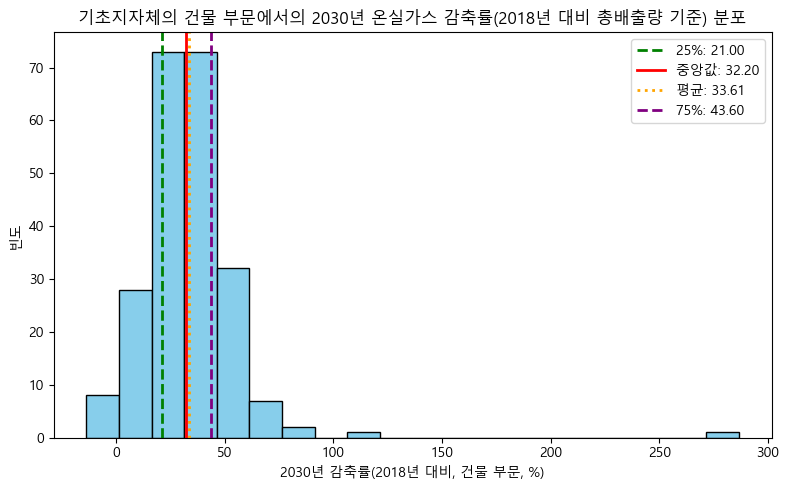

In [18]:
# dfb에서 2030년 감축률 분포 히스토그램과 요약 통계 (건물 부문)
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dfb 존재 여부 확인
if 'dfb' not in globals():
    raise RuntimeError("dfb가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 2030년 감축률 컬럼 찾기 (df에서와 동일한 컬럼명을 우선 사용)
col_2030_b = None
if 'col_2030' in globals() and col_2030 in dfb.columns:
    col_2030_b = col_2030
else:
    target_key = '2030년감축률'
    pattern = re.sub(r"\s+", "", target_key)
    for c in dfb.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern in cs:
            col_2030_b = c
            break

if col_2030_b is None:
    print("dfb에서 '2030년감축률' 컬럼을 찾지 못했습니다. 사용 가능한 컬럼:")
    print(dfb.columns.tolist())
else:
    print('dfb 2030년 감축률 컬럼명:', col_2030_b)
    # 숫자형으로 변환
    s = pd.to_numeric(dfb[col_2030_b], errors='coerce').dropna()

    if len(s) == 0:
        print('유효한 2030년 감축률 데이터가 없습니다.')
    else:
        q25 = s.quantile(0.25)
        median = s.median()
        mean = s.mean()
        q75 = s.quantile(0.75)

        print(f"개수: {len(s)}")
        print(f"25%: {q25:.2f}, 중앙값: {median:.2f}, 평균: {mean:.2f}, 75%: {q75:.2f}")

        plt.figure(figsize=(8, 5))
        plt.hist(s, bins=20, color='skyblue', edgecolor='black')
        plt.xlabel('2030년 감축률(2018년 대비, 건물 부문, %)')
        plt.ylabel('빈도')
        plt.title('기초지자체의 건물 부문에서의 2030년 온실가스 감축률(2018년 대비 총배출량 기준) 분포')

        # 분위수와 평균선 표시
        for v, label, color, style in [
            (q25, '25%', 'green', '--'),
            (median, '중앙값', 'red', '-'),
            (mean, '평균', 'orange', ':'),
            (q75, '75%', 'purple', '--'),
        ]:
            plt.axvline(v, color=color, linestyle=style, linewidth=2, label=f'{label}: {v:.2f}')

        plt.legend()
        plt.tight_layout()
        plt.show()

In [20]:
# dfb에서 2030년 감축률 상위 15개 / 하위 15개 지역 추출 및 표시 (건물 부문)
import re
import pandas as pd

# dfb 존재 여부 확인
if 'dfb' not in globals():
    raise RuntimeError("dfb가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 2030년 감축률 컬럼 찾기 (이전에 사용한 col_2030 우선)
col_2030_b = None
if 'col_2030' in globals() and col_2030 in dfb.columns:
    col_2030_b = col_2030
else:
    target_key = '2030년감축률'
    pattern = re.sub(r"\s+", "", target_key)
    for c in dfb.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern in cs:
            col_2030_b = c
            break

if col_2030_b is None:
    raise KeyError("dfb에서 '2030년감축률' 컬럼을 찾지 못했습니다.")

# 숫자형 감축률 컬럼 생성
dfb['_2030감축률_num'] = pd.to_numeric(dfb[col_2030_b], errors='coerce')

# 유효한 값만 사용
sub = dfb.dropna(subset=['_2030감축률_num']).copy()

# 표시할 기본 컬럼 (광역, 지역명, 원본 감축률, 숫자형 감축률)
cols_show = []
for c in ['광역', '지역명', col_2030_b, '_2030감축률_num']:
    if c in sub.columns and c not in cols_show:
        cols_show.append(c)

sub_view = sub[cols_show].copy()

# 상위 20 / 하위 20
top20_b = sub_view.sort_values('_2030감축률_num', ascending=False).head(15)
bottom20_b = sub_view.sort_values('_2030감축률_num', ascending=True).head(15)

print('\n기초자치단체 건물 부문 2030년 감축률 상위 15개 지역(총배출량 기준 2018년 대비):')
display(top20_b.reset_index(drop=True))

print('\n기초자치단체 건물 부문 2030년 감축률 하위 15개 지역(총배출량 기준 2018년 대비):')
display(bottom20_b.reset_index(drop=True))


기초자치단체 건물 부문 2030년 감축률 상위 15개 지역(총배출량 기준 2018년 대비):


,광역,지역명,2030년감축률,_2030감축률_num
0,충남,보령시,286.6,286.6
1,충남,당진시,119.7,119.7
2,전북,익산시,81.4,81.4
3,경기,이천시,77.7,77.7
4,부산,수영구,73.5,73.5
5,전북,진안군,72.0,72.0
6,경기,안성시,68.0,68.0
7,충남,논산시,67.1,67.1
8,전북,김제시,66.2,66.2
9,충북,충주시,65.2,65.2



기초자치단체 건물 부문 2030년 감축률 하위 15개 지역(총배출량 기준 2018년 대비):


,광역,지역명,2030년감축률,_2030감축률_num
0,경남,고성군,-13.6,-13.6
1,충북,단양군,-11.5,-11.5
2,경북,울릉군,-5.3,-5.3
3,경북,칠곡군,-4.1,-4.1
4,경남,하동군,-3.2,-3.2
5,경북,영천시,-0.5,-0.5
6,강원,횡성군,0.0,0.0
7,강원,고성군,0.7,0.7
8,인천,남동구,3.4,3.4
9,전남,장흥군,4.0,4.0


건물 부문 2030년 감축률 상위 15개 지역:


,광역,지역명,2030년감축률,_2030감축률_num
0,충남,보령시,286.6,286.6
1,충남,당진시,119.7,119.7
2,전북,익산시,81.4,81.4
3,경기,이천시,77.7,77.7
4,부산,수영구,73.5,73.5
5,전북,진안군,72.0,72.0
6,경기,안성시,68.0,68.0
7,충남,논산시,67.1,67.1
8,전북,김제시,66.2,66.2
9,충북,충주시,65.2,65.2



건물 부문 2030년 감축률 하위 15개 지역:


,광역,지역명,2030년감축률,_2030감축률_num
0,경남,고성군,-13.6,-13.6
1,충북,단양군,-11.5,-11.5
2,경북,울릉군,-5.3,-5.3
3,경북,칠곡군,-4.1,-4.1
4,경남,하동군,-3.2,-3.2
5,경북,영천시,-0.5,-0.5
6,강원,횡성군,0.0,0.0
7,강원,고성군,0.7,0.7
8,인천,남동구,3.4,3.4
9,전남,장흥군,4.0,4.0


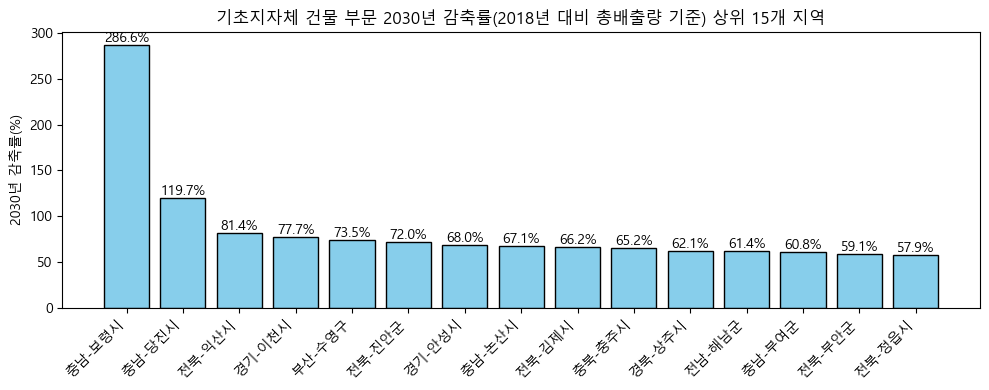

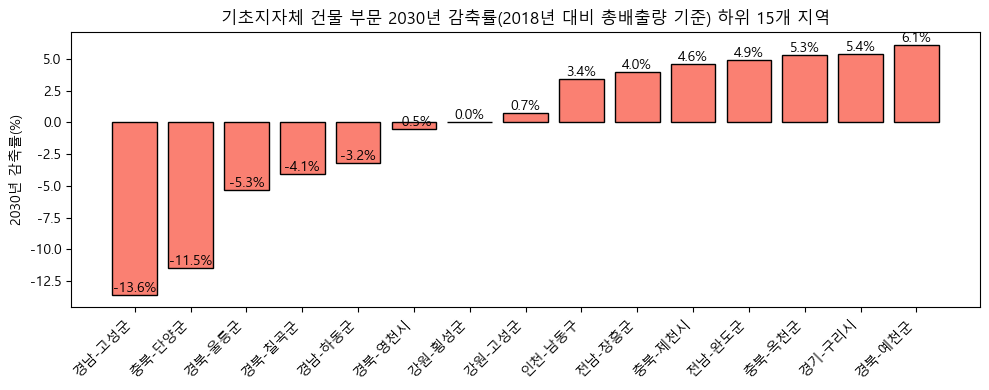

In [21]:
# dft에서 2030년 감축률 상위 15개 / 하위 15개 지역 세로 막대그래프 (건물 부문)
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dft 존재 여부 확인
if 'dfb' not in globals():
    raise RuntimeError("dfb가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 2030년 감축률 컬럼 찾기 (기존 col_2030 우선)
col_2030_t = None
if 'col_2030' in globals() and col_2030 in dfb.columns:
    col_2030_t = col_2030
else:
    target_key = '2030년감축률'
    pattern = re.sub(r"\\s+", "", target_key)
    for c in dfb.columns:
        cs = re.sub(r"\\s+", "", str(c))
        if pattern in cs:
            col_2030_t = c
            break

if col_2030_t is None:
    raise KeyError("dfb에서 '2030년감축률' 컬럼을 찾지 못했습니다.")

# 2030년 감축률 숫자형 컬럼 준비
if '_2030감축률_num' in dfb.columns:
    s_num_t = pd.to_numeric(dfb['_2030감축률_num'], errors='coerce')
else:
    s_num_t = pd.to_numeric(dfb[col_2030_t], errors='coerce')
    dfb['_2030감축률_num'] = s_num_t

# 기본 정보 포함한 데이터프레임 구성
cols_base_t = []
for c in ['광역', '지역명', col_2030_t, '_2030감축률_num']:
    if c in dfb.columns:
        cols_base_t.append(c)

rank_t = dfb[cols_base_t].copy()
rank_t = rank_t.dropna(subset=['_2030감축률_num'])

# 상위 15 / 하위 15
top15_t = rank_t.sort_values('_2030감축률_num', ascending=False).head(15)
bottom15_t = rank_t.sort_values('_2030감축률_num', ascending=True).head(15)

print('건물 부문 2030년 감축률 상위 15개 지역:')
display(top15_t.reset_index(drop=True))
print('\n건물 부문 2030년 감축률 하위 15개 지역:')
display(bottom15_t.reset_index(drop=True))

# 그래프용 레이블 (광역-지역명)
def make_labels_t(df_):
    if '광역' in df_.columns and '지역명' in df_.columns:
        return df_['광역'].astype(str) + '-' + df_['지역명'].astype(str)
    elif '지역명' in df_.columns:
        return df_['지역명'].astype(str)
    else:
        return df_.index.astype(str)

labels_top_t = make_labels_t(top15_t)
labels_bottom_t = make_labels_t(bottom15_t)

# 그래프 1: 상위 15
plt.figure(figsize=(10, 4))
x_top_t = range(len(top15_t))
plt.bar(x_top_t, top15_t['_2030감축률_num'], color='skyblue', edgecolor='black')
plt.xticks(x_top_t, labels_top_t, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('기초지자체 건물 부문 2030년 감축률(2018년 대비 총배출량 기준) 상위 15개 지역')

# 막대 위에 값 레이블 표시
for i, val in enumerate(top15_t['_2030감축률_num']):
    plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 그래프 2: 하위 15
plt.figure(figsize=(10, 4))
x_bot_t = range(len(bottom15_t))
plt.bar(x_bot_t, bottom15_t['_2030감축률_num'], color='salmon', edgecolor='black')
plt.xticks(x_bot_t, labels_bottom_t, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('기초지자체 건물 부문 2030년 감축률(2018년 대비 총배출량 기준) 하위 15개 지역')

# 막대 위에 값 레이블 표시
for i, val in enumerate(bottom15_t['_2030감축률_num']):
    plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

dfb 광역 컬럼명: 광역
dfb 2030년 감축률 컬럼명: 2030년감축률

건물 부문 광역별 평균 2030년 감축률(%)


,평균감축률(%)
광역,
충남,59.400000
대전,44.280000
경기,42.754839
전북,42.721429
부산,39.187500
대구,37.233333
서울,35.080000
울산,32.560000
인천,30.800000



건물 부문 전체 평균 2030년 감축률: 34.03%


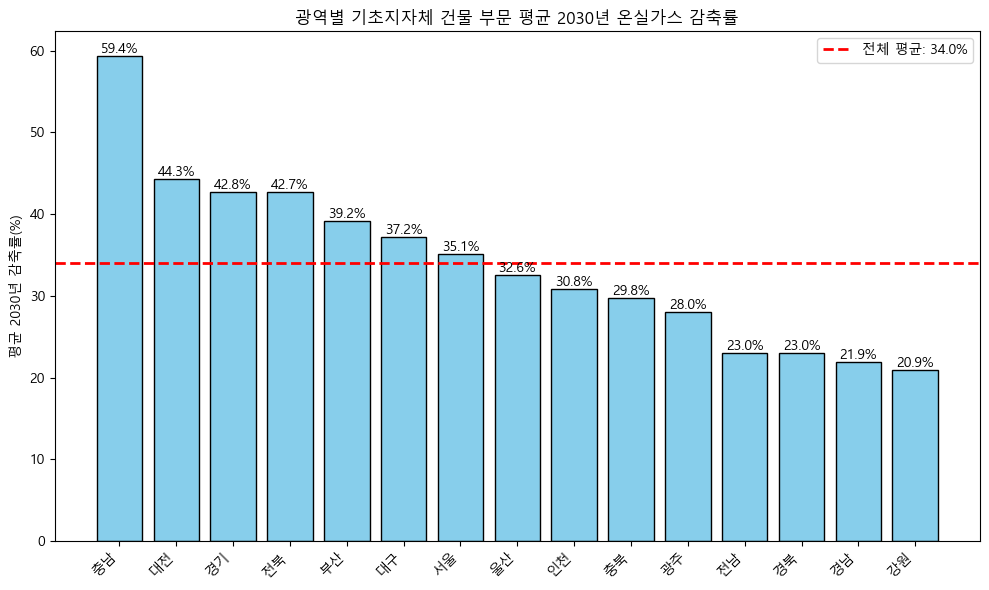

In [22]:
# dfb에서 광역별 평균 2030년 감축률 막대그래프 (건물 부문)
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dfb 존재 여부 확인
if 'dfb' not in globals():
    raise RuntimeError("dfb가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 광역 컬럼 자동 탐색 (예: 광역, 시도 등 포함)
region_col_b = None
for c in dfb.columns:
    cs = re.sub(r"\s+", "", str(c))
    if ('광역' in cs) or ('시도' in cs):
        region_col_b = c
        break

if region_col_b is None:
    raise KeyError("dfb에서 광역 단위를 나타내는 컬럼을 찾지 못했습니다.")

# 2030년 감축률 컬럼 찾기 (이전에 사용한 col_2030 우선)
col_2030_b = None
if 'col_2030' in globals() and col_2030 in dfb.columns:
    col_2030_b = col_2030
else:
    target_key = '2030년감축률'
    pattern = re.sub(r"\s+", "", target_key)
    for c in dfb.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern in cs:
            col_2030_b = c
            break

if col_2030_b is None:
    raise KeyError("dfb에서 '2030년감축률' 컬럼을 찾지 못했습니다.")

print('dfb 광역 컬럼명:', region_col_b)
print('dfb 2030년 감축률 컬럼명:', col_2030_b)

# 2030년 감축률 숫자형 컬럼 준비
if '_2030감축률_num' in dfb.columns:
    s_b = pd.to_numeric(dfb['_2030감축률_num'], errors='coerce')
else:
    s_b = pd.to_numeric(dfb[col_2030_b], errors='coerce')
    dfb['_2030감축률_num'] = s_b

# 광역별 평균 계산
grp_b = (
    dfb
    .dropna(subset=['_2030감축률_num'])
    .groupby(region_col_b)['_2030감축률_num']
    .mean()
    .sort_values(ascending=False)
)

print('\n건물 부문 광역별 평균 2030년 감축률(%)')
display(grp_b.to_frame('평균감축률(%)'))

# 전체 평균 (광역 평균들의 평균)
overall_mean_b = grp_b.mean()
print(f"\n건물 부문 전체 평균 2030년 감축률: {overall_mean_b:.2f}%")

# 막대그래프
plt.figure(figsize=(10, 6))
x = range(len(grp_b))
plt.bar(x, grp_b.values, color='skyblue', edgecolor='black')
plt.xticks(x, grp_b.index, rotation=45, ha='right')
plt.ylabel('평균 2030년 감축률(%)')
plt.title('광역별 기초지자체 건물 부문 평균 2030년 온실가스 감축률')

# 각 막대 위에 값 레이블 표시
for i, val in enumerate(grp_b.values):
    plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

# 전체 평균 수평 점선 (빨간색)
plt.axhline(overall_mean_b, color='red', linestyle='--', linewidth=2, label=f'전체 평균: {overall_mean_b:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

건물 부문 도시유형: ['중소도시' '농어촌' '대도시']
도시유형=중소도시 (표본 수=50개, 중앙값=34.35, 평균=36.41)
도시유형=농어촌 (표본 수=88개, 중앙값=22.75, 평균=28.28)
도시유형=대도시 (표본 수=87개, 중앙값=37.70, 평균=37.40)


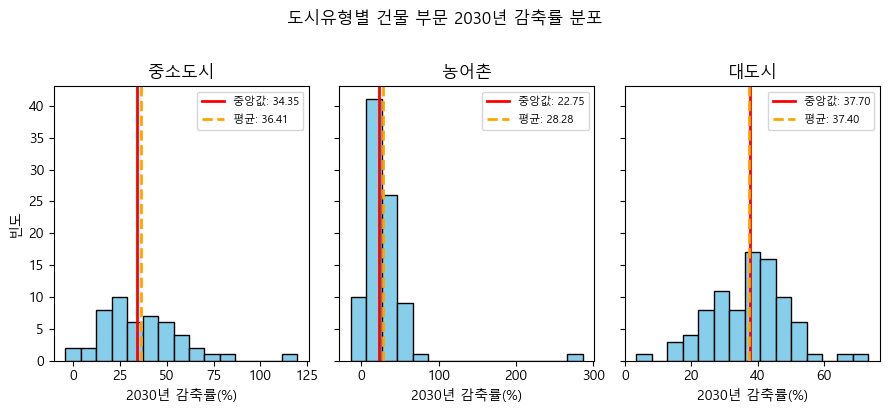

In [23]:
# dfb에서 도시유형별 2030년 감축률 분포 (한 장의 이미지로 표시)
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dfb 존재 여부 확인
if 'dfb' not in globals():
    raise RuntimeError("dfb가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 도시유형 컬럼 확인/탐색
if 'col_type' in globals() and col_type in dfb.columns:
    col_type_b = col_type
else:
    col_type_b = None
    target_key_type = '도시유형'
    pattern_type = re.sub(r"\s+", "", target_key_type)
    for c in dfb.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern_type in cs:
            col_type_b = c
            break

if col_type_b is None:
    raise KeyError("dfb에서 '도시유형' 컬럼을 찾지 못했습니다.")

# 2030년 감축률 컬럼 확인/탐색
col_2030_b = None
if 'col_2030' in globals() and col_2030 in dfb.columns:
    col_2030_b = col_2030
else:
    target_key_2030 = '2030년감축률'
    pattern_2030 = re.sub(r"\s+", "", target_key_2030)
    for c in dfb.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern_2030 in cs:
            col_2030_b = c
            break

if col_2030_b is None:
    raise KeyError("dfb에서 '2030년감축률' 컬럼을 찾지 못했습니다.")

# 숫자형 감축률 컬럼 준비
if '_2030감축률_num' in dfb.columns:
    dfb['_2030감축률_num'] = pd.to_numeric(dfb['_2030감축률_num'], errors='coerce')
else:
    dfb['_2030감축률_num'] = pd.to_numeric(dfb[col_2030_b], errors='coerce')

# 도시유형 값 목록
city_types_b = (
    dfb[col_type_b]
    .astype(str)
    .str.strip()
    .replace('', pd.NA)
    .dropna()
    .unique()
)

print('건물 부문 도시유형:', city_types_b)

n_types = len(city_types_b)
if n_types == 0:
    raise RuntimeError('도시유형 정보가 없습니다.')

fig, axes = plt.subplots(1, n_types, figsize=(3 * n_types, 4), sharey=True)
if n_types == 1:
    axes = [axes]

for ax, ct in zip(axes, city_types_b):
    sub = dfb[dfb[col_type_b].astype(str).str.strip() == str(ct)].copy()
    vals = sub['_2030감축률_num'].dropna()

    if len(vals) == 0:
        ax.set_visible(False)
        continue

    median_ct = vals.median()
    mean_ct = vals.mean()

    print(f"도시유형={ct} (표본 수={len(vals)}개, 중앙값={median_ct:.2f}, 평균={mean_ct:.2f})")

    ax.hist(vals, bins=15, color='skyblue', edgecolor='black')
    ax.set_xlabel('2030년 감축률(%)')
    ax.set_title(str(ct))

    # 중앙값·평균선 표시
    ax.axvline(median_ct, color='red', linestyle='-', linewidth=2, label=f'중앙값: {median_ct:.2f}')
    ax.axvline(mean_ct, color='orange', linestyle='--', linewidth=2, label=f'평균: {mean_ct:.2f}')
    ax.legend(fontsize=8)

axes[0].set_ylabel('빈도')
plt.suptitle('도시유형별 건물 부문 2030년 감축률 분포', y=1.02)
plt.tight_layout()
plt.show()

서울시 건물 부문 자치구 수: 25개

서울시 자치구별 건물 부문 평균 2030년 감축률(%)


,평균감축률(%)
지역명,
강동구,53.2
서초구,48.7
도봉구,42.8
성북구,42.1
송파구,40.9
중구,40.8
양천구,40.5
광진구,39.1
금천구,37.7


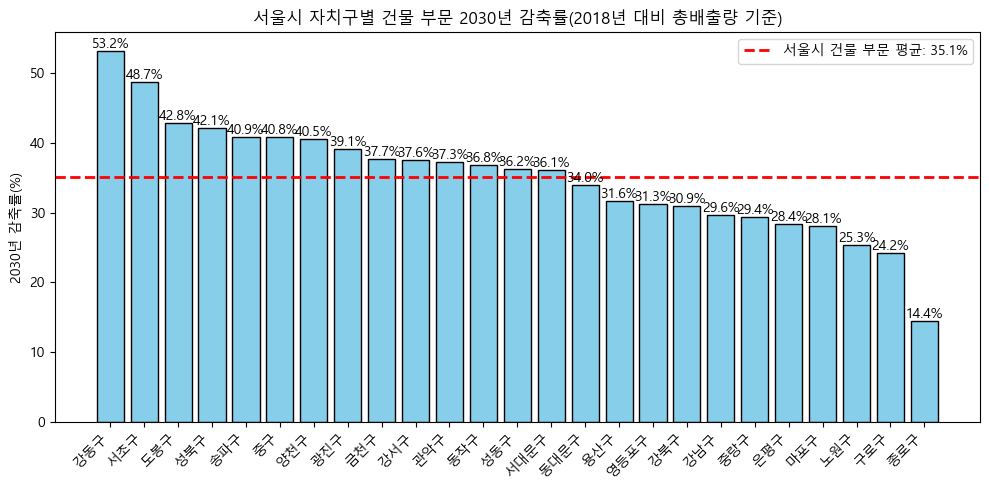

In [24]:
# dfb에서 서울 자치구별 건물 부문 2030년 감축률 세로 막대그래프
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 건물 부문 데이터프레임 확인 (사용자가 언급한 dfd 대신 dfb 사용)
if 'dfb' not in globals():
    raise RuntimeError("dfb(건물 부문 데이터프레임)가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 필요한 컬럼 확인
required_cols_b = ['광역', '지역명']
for col in required_cols_b:
    if col not in dfb.columns:
        raise KeyError(f"dfb에 '{col}' 컬럼이 없습니다.")

# 2030년 감축률 숫자형 컬럼 준비
if '_2030감축률_num' in dfb.columns:
    dfb['_2030감축률_num'] = pd.to_numeric(dfb['_2030감축률_num'], errors='coerce')
else:
    # 기존에 찾은 col_2030 컬럼이 있으면 활용
    if 'col_2030' in globals() and col_2030 in dfb.columns:
        col_2030_b = col_2030
    else:
        # dfb 안에서 직접 탐색
        import re
        target_key = '2030년감축률'
        pattern = re.sub(r"\\s+", "", target_key)
        col_2030_b = None
        for c in dfb.columns:
            cs = re.sub(r"\\s+", "", str(c))
            if pattern in cs:
                col_2030_b = c
                break
        if col_2030_b is None:
            raise KeyError("dfb에서 '2030년감축률' 컬럼을 찾지 못했습니다.")
    dfb['_2030감축률_num'] = pd.to_numeric(dfb[col_2030_b], errors='coerce')

# 서울시 자치구만 선택
seoul_b = dfb[dfb['광역'] == '서울'].copy()
seoul_b = seoul_b.dropna(subset=['_2030감축률_num'])

if seoul_b.empty:
    raise RuntimeError('dfb에서 서울(광역=\"서울\") 건물 부문 데이터가 없습니다.')

# 자치구(지역명)별 평균 감축률 계산 (혹시 여러 행이 있을 경우를 대비해 평균 사용)
seoul_grp = (
    seoul_b
    .groupby('지역명')['_2030감축률_num']
    .mean()
    .sort_values(ascending=False)
)

print(f"서울시 건물 부문 자치구 수: {len(seoul_grp)}개")
print('\n서울시 자치구별 건물 부문 평균 2030년 감축률(%)')
display(seoul_grp.to_frame('평균감축률(%)'))

# 그래프 준비
x = range(len(seoul_grp))
labels = seoul_grp.index.astype(str)
values = seoul_grp.values
mean_val_b = seoul_grp.mean()

plt.figure(figsize=(10, 5))
plt.bar(x, values, color='skyblue', edgecolor='black')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('서울시 자치구별 건물 부문 2030년 감축률(2018년 대비 총배출량 기준)')

# 막대 위에 값 레이블 표시
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# 서울시 건물 부문 평균 감축률 가로 점선 (빨간색)
plt.axhline(mean_val_b, color='red', linestyle='--', linewidth=2, label=f'서울시 건물 부문 평균: {mean_val_b:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

- 교통부문 2030년 감축률 알아보기
- 좀 더 간단히


In [26]:
# df에서 '구분'이 '교통'인 행만 추출하여 dft에 저장
import pandas as pd

if 'df' not in globals() or 'col_div' not in globals():
    raise RuntimeError("df 또는 col_div가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# '구분' 컬럼에서 '교통'에 해당하는 행만 필터링
dft = df[df[col_div].astype(str).str.strip() == '수송'].copy()

print('dft 크기:', dft.shape)
display(dft.head())

dft 크기: (225, 18)


,광역,지역명,광역_지역명,구분,도시유형,총인구수_명,GRDP_억원,노령화지수,2018년,2025년,2026년,2027년,2028년,2029년,2030년,2034년,2030년감축률,2034년감축률
2,강원,강릉시,강원 강릉시,수송,중소도시,207731,69199,51.0,441.0,448.0,448.0,448.0,448.0,448.0,448.0,448.0,-1.6,-1.6
8,강원,고성군,강원 고성군,수송,농어촌,26999,15025,55.0,56.0,64.0,65.0,66.0,67.0,68.0,69.0,73.0,-23.2,-30.4
14,강원,동해시,강원 동해시,수송,농어촌,87675,39329,51.0,176.0,169.0,168.0,167.0,166.0,166.0,165.0,162.0,6.2,8.0
20,강원,삼척시,강원 삼척시,수송,농어촌,61735,33564,53.0,125.0,NaN,NaN,NaN,NaN,NaN,71.0,75.0,43.2,40.0
26,강원,속초시,강원 속초시,수송,농어촌,80933,22006,51.0,149.0,151.0,150.0,149.0,147.0,145.0,142.0,108.0,4.7,27.5


dft 2030년 감축률 컬럼명: 2030년감축률
개수: 225
25%: 3.00, 중앙값: 13.60, 평균: 15.31, 75%: 28.20


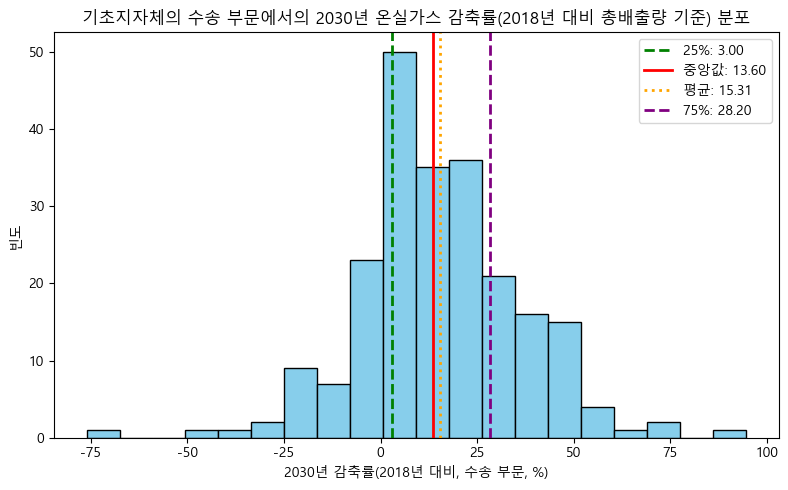

In [27]:
# dft에서 2030년 감축률 분포 히스토그램과 요약 통계 (수송 부문)
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dft 존재 여부 확인
if 'dft' not in globals():
    raise RuntimeError("dft가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 2030년 감축률 컬럼 찾기 (df/df_sum에서 사용한 col_2030을 우선 활용)
col_2030_t = None
if 'col_2030' in globals() and col_2030 in dft.columns:
    col_2030_t = col_2030
else:
    target_key = '2030년감축률'
    pattern = re.sub(r"\s+", "", target_key)
    for c in dft.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern in cs:
            col_2030_t = c
            break

if col_2030_t is None:
    print("dft에서 '2030년감축률' 컬럼을 찾지 못했습니다. 사용 가능한 컬럼:")
    print(dft.columns.tolist())
else:
    print('dft 2030년 감축률 컬럼명:', col_2030_t)
    # 숫자형으로 변환
    s = pd.to_numeric(dft[col_2030_t], errors='coerce').dropna()

    if len(s) == 0:
        print('유효한 2030년 감축률 데이터가 없습니다.')
    else:
        q25 = s.quantile(0.25)
        median = s.median()
        mean = s.mean()
        q75 = s.quantile(0.75)

        print(f"개수: {len(s)}")
        print(f"25%: {q25:.2f}, 중앙값: {median:.2f}, 평균: {mean:.2f}, 75%: {q75:.2f}")

        plt.figure(figsize=(8, 5))
        plt.hist(s, bins=20, color='skyblue', edgecolor='black')
        plt.xlabel('2030년 감축률(2018년 대비, 수송 부문, %)')
        plt.ylabel('빈도')
        plt.title('기초지자체의 수송 부문에서의 2030년 온실가스 감축률(2018년 대비 총배출량 기준) 분포')

        # 분위수와 평균선 표시
        for v, label, color, style in [
            (q25, '25%', 'green', '--'),
            (median, '중앙값', 'red', '-'),
            (mean, '평균', 'orange', ':'),
            (q75, '75%', 'purple', '--'),
        ]:
            plt.axvline(v, color=color, linestyle=style, linewidth=2, label=f'{label}: {v:.2f}')

        plt.legend()
        plt.tight_layout()
        plt.show()

수송 부문 2030년 감축률 상위 15개 지역:


,광역,지역명,2030년감축률,_2030감축률_num
0,전남,고흥군,94.5,94.5
1,전남,함평군,76.7,76.7
2,서울,마포구,72.5,72.5
3,서울,은평구,64.9,64.9
4,부산,영도구,58.4,58.4
5,경기,구리시,58.3,58.3
6,대구,중구,57.4,57.4
7,서울,동대문구,53.6,53.6
8,서울,용산구,50.5,50.5
9,대구,달서구,49.7,49.7



수송 부문 2030년 감축률 하위 15개 지역:


,광역,지역명,2030년감축률,_2030감축률_num
0,대구,군위군,-76.1,-76.1
1,부산,수영구,-46.9,-46.9
2,강원,횡성군,-36.8,-36.8
3,경북,예천군,-32.7,-32.7
4,경북,칠곡군,-27.0,-27.0
5,경북,김천시,-23.6,-23.6
6,경북,영천시,-23.3,-23.3
7,강원,고성군,-23.2,-23.2
8,경북,청도군,-20.6,-20.6
9,경기,가평군,-20.3,-20.3


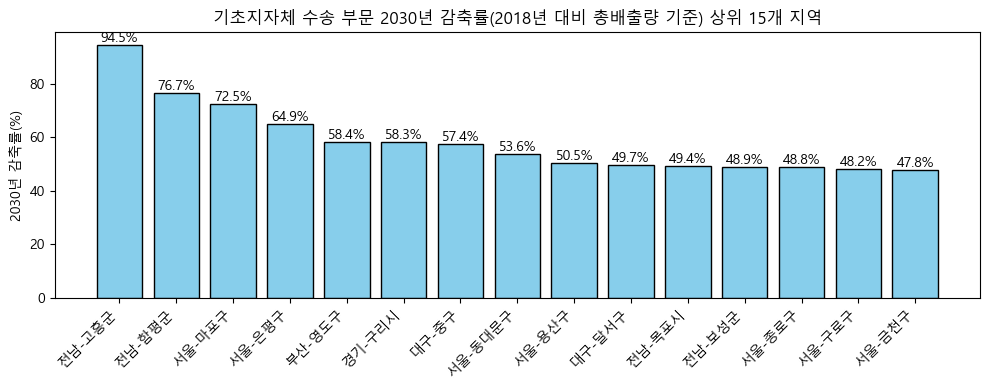

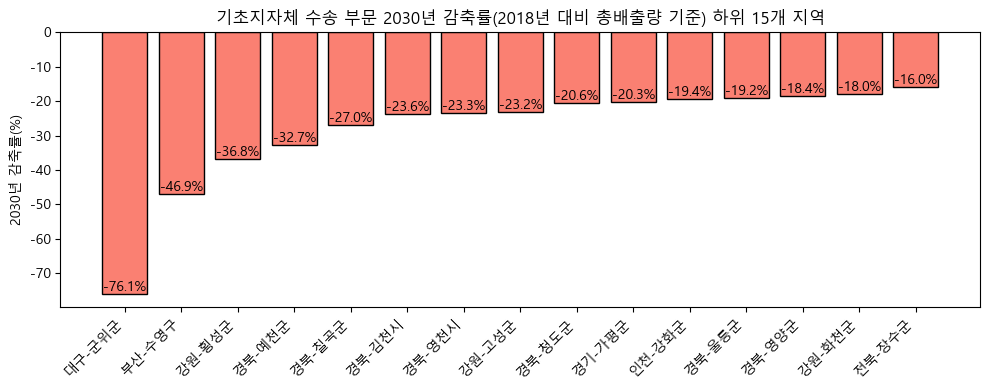

In [28]:
# dft에서 2030년 감축률 상위 15개 / 하위 15개 지역 세로 막대그래프 (수송 부문)
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dft 존재 여부 확인
if 'dft' not in globals():
    raise RuntimeError("dft가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 2030년 감축률 컬럼 찾기 (기존 col_2030 우선)
col_2030_t = None
if 'col_2030' in globals() and col_2030 in dft.columns:
    col_2030_t = col_2030
else:
    target_key = '2030년감축률'
    pattern = re.sub(r"\\s+", "", target_key)
    for c in dft.columns:
        cs = re.sub(r"\\s+", "", str(c))
        if pattern in cs:
            col_2030_t = c
            break

if col_2030_t is None:
    raise KeyError("dft에서 '2030년감축률' 컬럼을 찾지 못했습니다.")

# 2030년 감축률 숫자형 컬럼 준비
if '_2030감축률_num' in dft.columns:
    s_num_t = pd.to_numeric(dft['_2030감축률_num'], errors='coerce')
else:
    s_num_t = pd.to_numeric(dft[col_2030_t], errors='coerce')
    dft['_2030감축률_num'] = s_num_t

# 기본 정보 포함한 데이터프레임 구성
cols_base_t = []
for c in ['광역', '지역명', col_2030_t, '_2030감축률_num']:
    if c in dft.columns:
        cols_base_t.append(c)

rank_t = dft[cols_base_t].copy()
rank_t = rank_t.dropna(subset=['_2030감축률_num'])

# 상위 15 / 하위 15
top15_t = rank_t.sort_values('_2030감축률_num', ascending=False).head(15)
bottom15_t = rank_t.sort_values('_2030감축률_num', ascending=True).head(15)

print('수송 부문 2030년 감축률 상위 15개 지역:')
display(top15_t.reset_index(drop=True))
print('\n수송 부문 2030년 감축률 하위 15개 지역:')
display(bottom15_t.reset_index(drop=True))

# 그래프용 레이블 (광역-지역명)
def make_labels_t(df_):
    if '광역' in df_.columns and '지역명' in df_.columns:
        return df_['광역'].astype(str) + '-' + df_['지역명'].astype(str)
    elif '지역명' in df_.columns:
        return df_['지역명'].astype(str)
    else:
        return df_.index.astype(str)

labels_top_t = make_labels_t(top15_t)
labels_bottom_t = make_labels_t(bottom15_t)

# 그래프 1: 상위 15
plt.figure(figsize=(10, 4))
x_top_t = range(len(top15_t))
plt.bar(x_top_t, top15_t['_2030감축률_num'], color='skyblue', edgecolor='black')
plt.xticks(x_top_t, labels_top_t, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('기초지자체 수송 부문 2030년 감축률(2018년 대비 총배출량 기준) 상위 15개 지역')

# 막대 위에 값 레이블 표시
for i, val in enumerate(top15_t['_2030감축률_num']):
    plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 그래프 2: 하위 15
plt.figure(figsize=(10, 4))
x_bot_t = range(len(bottom15_t))
plt.bar(x_bot_t, bottom15_t['_2030감축률_num'], color='salmon', edgecolor='black')
plt.xticks(x_bot_t, labels_bottom_t, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('기초지자체 수송 부문 2030년 감축률(2018년 대비 총배출량 기준) 하위 15개 지역')

# 막대 위에 값 레이블 표시
for i, val in enumerate(bottom15_t['_2030감축률_num']):
    plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

dft 광역 컬럼명: 광역
dft 2030년 감축률 컬럼명: 2030년감축률

수송 부문 광역별 평균 2030년 감축률(%)


,평균감축률(%)
광역,
서울,41.680000
울산,22.080000
전남,21.868182
광주,20.820000
대구,20.100000
인천,19.877778
충남,19.106667
부산,17.793750
경남,15.644444



수송 부문 전체 평균 2030년 감축률: 15.60%


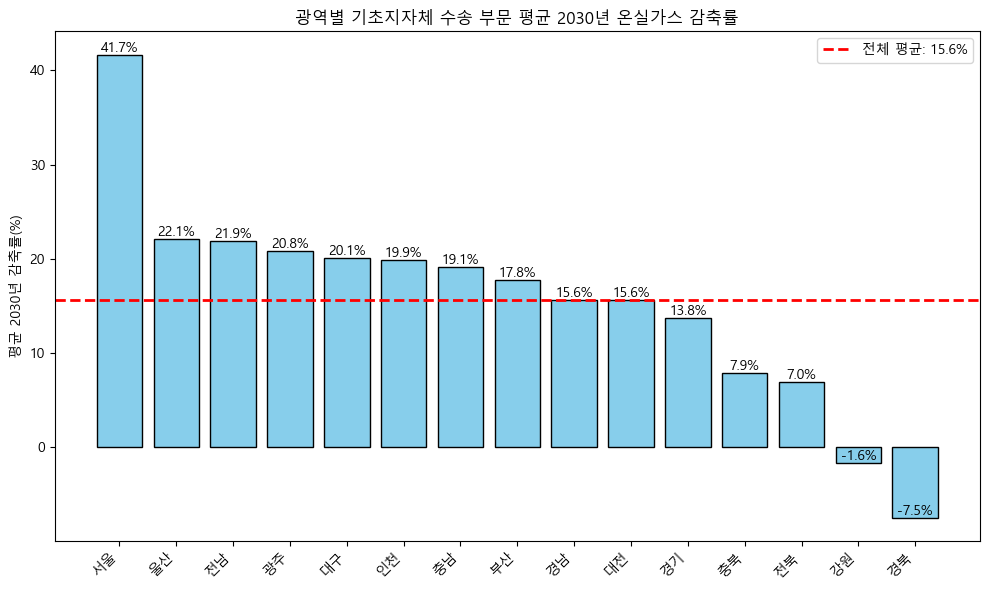

In [29]:
# dft에서 광역별 평균 2030년 감축률 막대그래프 (수송 부문)
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dft 존재 여부 확인
if 'dft' not in globals():
    raise RuntimeError("dft가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 광역 컬럼 자동 탐색 (예: 광역, 시도 등 포함)
region_col_t = None
for c in dft.columns:
    cs = re.sub(r"\s+", "", str(c))
    if ('광역' in cs) or ('시도' in cs):
        region_col_t = c
        break

if region_col_t is None:
    raise KeyError("dft에서 광역 단위를 나타내는 컬럼을 찾지 못했습니다.")

# 2030년 감축률 컬럼 찾기 (기존 col_2030 우선)
col_2030_t = None
if 'col_2030' in globals() and col_2030 in dft.columns:
    col_2030_t = col_2030
else:
    target_key = '2030년감축률'
    pattern = re.sub(r"\s+", "", target_key)
    for c in dft.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern in cs:
            col_2030_t = c
            break

if col_2030_t is None:
    raise KeyError("dft에서 '2030년감축률' 컬럼을 찾지 못했습니다.")

print('dft 광역 컬럼명:', region_col_t)
print('dft 2030년 감축률 컬럼명:', col_2030_t)

# 2030년 감축률 숫자형 컬럼 준비
if '_2030감축률_num' in dft.columns:
    s_t = pd.to_numeric(dft['_2030감축률_num'], errors='coerce')
else:
    s_t = pd.to_numeric(dft[col_2030_t], errors='coerce')
    dft['_2030감축률_num'] = s_t

# 광역별 평균 계산
grp_t = (
    dft
    .dropna(subset=['_2030감축률_num'])
    .groupby(region_col_t)['_2030감축률_num']
    .mean()
    .sort_values(ascending=False)
)

print('\n수송 부문 광역별 평균 2030년 감축률(%)')
display(grp_t.to_frame('평균감축률(%)'))

# 전체 평균 (광역 평균들의 평균)
overall_mean_t = grp_t.mean()
print(f"\n수송 부문 전체 평균 2030년 감축률: {overall_mean_t:.2f}%")

# 막대그래프
plt.figure(figsize=(10, 6))
x = range(len(grp_t))
plt.bar(x, grp_t.values, color='skyblue', edgecolor='black')
plt.xticks(x, grp_t.index, rotation=45, ha='right')
plt.ylabel('평균 2030년 감축률(%)')
plt.title('광역별 기초지자체 수송 부문 평균 2030년 온실가스 감축률')

# 각 막대 위에 값 레이블 표시
for i, val in enumerate(grp_t.values):
    plt.text(i, val, f'{val:.1f}%', ha='center', va='bottom')

# 전체 평균 수평 점선 (빨간색)
plt.axhline(overall_mean_t, color='red', linestyle='--', linewidth=2, label=f'전체 평균: {overall_mean_t:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

수송 부문 도시유형: ['중소도시' '농어촌' '대도시']
도시유형=중소도시 (표본 수=48개, 중앙값=7.05, 평균=10.94)
도시유형=농어촌 (표본 수=90개, 중앙값=5.20, 평균=6.30)
도시유형=대도시 (표본 수=87개, 중앙값=25.70, 평균=27.03)


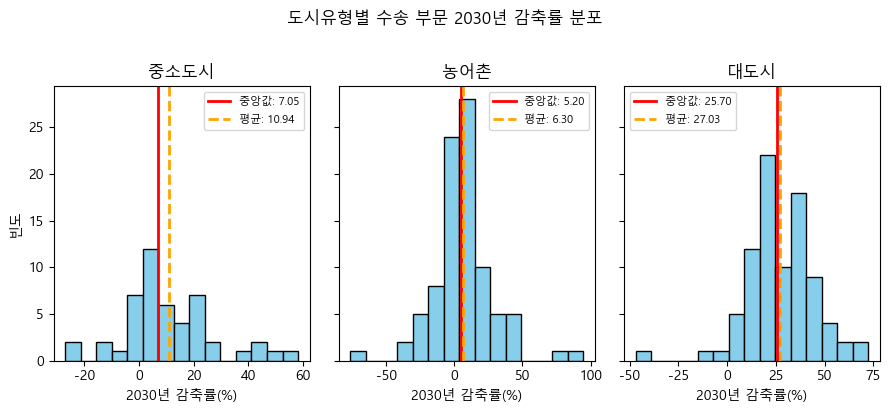

In [30]:
# dft에서 도시유형별 2030년 감축률 분포 (한 장의 이미지로 표시, 수송 부문)
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dft 존재 여부 확인
if 'dft' not in globals():
    raise RuntimeError("dft가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 도시유형 컬럼 확인/탐색
if 'col_type' in globals() and col_type in dft.columns:
    col_type_t = col_type
else:
    col_type_t = None
    target_key_type = '도시유형'
    pattern_type = re.sub(r"\s+", "", target_key_type)
    for c in dft.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern_type in cs:
            col_type_t = c
            break

if col_type_t is None:
    raise KeyError("dft에서 '도시유형' 컬럼을 찾지 못했습니다.")

# 2030년 감축률 컬럼 확인/탐색
col_2030_t = None
if 'col_2030' in globals() and col_2030 in dft.columns:
    col_2030_t = col_2030
else:
    target_key_2030 = '2030년감축률'
    pattern_2030 = re.sub(r"\s+", "", target_key_2030)
    for c in dft.columns:
        cs = re.sub(r"\s+", "", str(c))
        if pattern_2030 in cs:
            col_2030_t = c
            break

if col_2030_t is None:
    raise KeyError("dft에서 '2030년감축률' 컬럼을 찾지 못했습니다.")

# 숫자형 감축률 컬럼 준비
if '_2030감축률_num' in dft.columns:
    dft['_2030감축률_num'] = pd.to_numeric(dft['_2030감축률_num'], errors='coerce')
else:
    dft['_2030감축률_num'] = pd.to_numeric(dft[col_2030_t], errors='coerce')

# 도시유형 값 목록
city_types_t = (
    dft[col_type_t]
    .astype(str)
    .str.strip()
    .replace('', pd.NA)
    .dropna()
    .unique()
)

print('수송 부문 도시유형:', city_types_t)

n_types = len(city_types_t)
if n_types == 0:
    raise RuntimeError('도시유형 정보가 없습니다.')

fig, axes = plt.subplots(1, n_types, figsize=(3 * n_types, 4), sharey=True)
if n_types == 1:
    axes = [axes]

for ax, ct in zip(axes, city_types_t):
    sub = dft[dft[col_type_t].astype(str).str.strip() == str(ct)].copy()
    vals = sub['_2030감축률_num'].dropna()

    if len(vals) == 0:
        ax.set_visible(False)
        continue

    median_ct = vals.median()
    mean_ct = vals.mean()

    print(f"도시유형={ct} (표본 수={len(vals)}개, 중앙값={median_ct:.2f}, 평균={mean_ct:.2f})")

    ax.hist(vals, bins=15, color='skyblue', edgecolor='black')
    ax.set_xlabel('2030년 감축률(%)')
    ax.set_title(str(ct))

    # 중앙값·평균선 표시 (선택적으로 시각 보조)
    ax.axvline(median_ct, color='red', linestyle='-', linewidth=2, label=f'중앙값: {median_ct:.2f}')
    ax.axvline(mean_ct, color='orange', linestyle='--', linewidth=2, label=f'평균: {mean_ct:.2f}')
    ax.legend(fontsize=8)

axes[0].set_ylabel('빈도')
plt.suptitle('도시유형별 수송 부문 2030년 감축률 분포', y=1.02)
plt.tight_layout()
plt.show()

서울시 수송 부문 자치구 수: 25개

서울시 자치구별 수송 부문 평균 2030년 감축률(%)


,평균감축률(%)
지역명,
마포구,72.5
은평구,64.9
동대문구,53.6
용산구,50.5
종로구,48.8
구로구,48.2
금천구,47.8
강서구,46.0
강남구,44.4


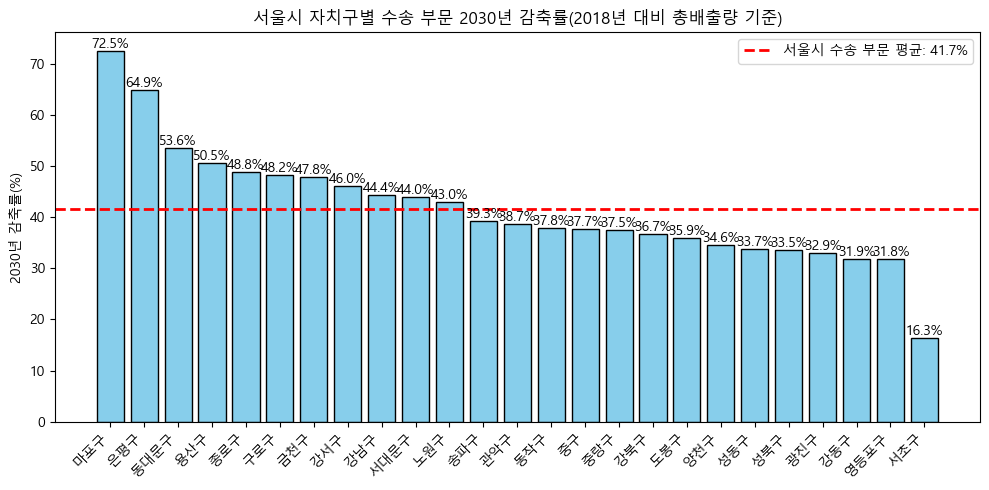

In [31]:
# dft에서 서울 자치구별 2030년 감축률 세로 막대그래프 (수송 부문)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows - 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# dft 존재 여부 확인
if 'dft' not in globals():
    raise RuntimeError("dft(수송 부문 데이터프레임)가 정의되어 있지 않습니다. 앞의 셀들을 먼저 실행해 주세요.")

# 필요한 컬럼 확인
for col in ['광역', '지역명']:
    if col not in dft.columns:
        raise KeyError(f"dft에 '{col}' 컬럼이 없습니다.")

# 2030년 감축률 숫자형 컬럼 준비
if '_2030감축률_num' in dft.columns:
    dft['_2030감축률_num'] = pd.to_numeric(dft['_2030감축률_num'], errors='coerce')
else:
    # 기존에 찾은 col_2030 컬럼이 있으면 활용
    if 'col_2030' in globals() and col_2030 in dft.columns:
        col_2030_t = col_2030
    else:
        import re
        target_key = '2030년감축률'
        pattern = re.sub(r"\s+", "", target_key)
        col_2030_t = None
        for c in dft.columns:
            cs = re.sub(r"\s+", "", str(c))
            if pattern in cs:
                col_2030_t = c
                break
        if col_2030_t is None:
            raise KeyError("dft에서 '2030년감축률' 컬럼을 찾지 못했습니다.")
    dft['_2030감축률_num'] = pd.to_numeric(dft[col_2030_t], errors='coerce')

# 서울시 자치구만 선택
seoul_t = dft[dft['광역'] == '서울'].copy()
seoul_t = seoul_t.dropna(subset=['_2030감축률_num'])

if seoul_t.empty:
    raise RuntimeError('dft에서 서울(광역="서울") 수송 부문 데이터가 없습니다.')

# 자치구(지역명)별 평균 감축률 계산 (여러 행이 있을 경우 평균 사용)
seoul_grp_t = (
    seoul_t
    .groupby('지역명')['_2030감축률_num']
    .mean()
    .sort_values(ascending=False)
)

print(f"서울시 수송 부문 자치구 수: {len(seoul_grp_t)}개")
print('\n서울시 자치구별 수송 부문 평균 2030년 감축률(%)')
display(seoul_grp_t.to_frame('평균감축률(%)'))

# 그래프 준비
x = range(len(seoul_grp_t))
labels = seoul_grp_t.index.astype(str)
values = seoul_grp_t.values
mean_val_t = seoul_grp_t.mean()

plt.figure(figsize=(10, 5))
plt.bar(x, values, color='skyblue', edgecolor='black')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('2030년 감축률(%)')
plt.title('서울시 자치구별 수송 부문 2030년 감축률(2018년 대비 총배출량 기준)')

# 막대 위에 값 레이블 표시
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# 서울시 수송 부문 평균 감축률 가로 점선 (빨간색)
plt.axhline(mean_val_t, color='red', linestyle='--', linewidth=2, label=f'서울시 수송 부문 평균: {mean_val_t:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()